<a href="https://colab.research.google.com/github/sysu17363098/kddcup2022/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
root = '/content/drive/MyDrive/BDT SEM2/Baidu_KDD/data/'
wtbdata = 'wtbdata_245days.csv'
sdwpf = 'sdwpf_baidukddcup2022_turb_location.CSV'

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn.objects as so

In [3]:
location_df = pd.read_csv(root+sdwpf)
wtb_df = pd.read_csv(root+wtbdata)

# Basic Views

## Basic View of tables

In [ ]:
location_df.head(5)

TurbID          x           y
0       1  3349.8515  5939.23193
1       2  3351.0017  6416.64673
2       3  3314.7797  6892.18395
3       4  3352.0940  7366.14203
4       5  3355.3420  7841.20175

In [ ]:
wtb_df.head(5)

TurbID  Day Tmstamp  Wspd  Wdir   Etmp   Itmp   Ndir  Pab1  Pab2  Pab3  \
0       1    1   00:00   NaN   NaN    NaN    NaN    NaN   NaN   NaN   NaN   
1       1    1   00:10  6.17 -3.99  30.73  41.80  25.92   1.0   1.0   1.0   
2       1    1   00:20  6.27 -2.18  30.60  41.63  20.91   1.0   1.0   1.0   
3       1    1   00:30  6.42 -0.73  30.52  41.52  20.91   1.0   1.0   1.0   
4       1    1   00:40  6.25  0.89  30.49  41.38  20.91   1.0   1.0   1.0   

   Prtv    Patv  
0   NaN     NaN  
1 -0.25  494.66  
2 -0.24  509.76  
3 -0.26  542.53  
4 -0.23  509.36

In [ ]:
wtb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4727520 entries, 0 to 4727519
Data columns (total 13 columns):
 #   Column   Dtype  
---  ------   -----  
 0   TurbID   int64  
 1   Day      int64  
 2   Tmstamp  object 
 3   Wspd     float64
 4   Wdir     float64
 5   Etmp     float64
 6   Itmp     float64
 7   Ndir     float64
 8   Pab1     float64
 9   Pab2     float64
 10  Pab3     float64
 11  Prtv     float64
 12  Patv     float64
dtypes: float64(10), int64(2), object(1)
memory usage: 468.9+ MB


statistic info:

In [ ]:
wtb_df.describe()

TurbID           Day          Wspd          Wdir          Etmp  \
count  4.727520e+06  4.727520e+06  4.678002e+06  4.678002e+06  4.678002e+06   
mean   6.750000e+01  1.230000e+02  5.028376e+00  4.975428e-01  4.110668e+01   
std    3.868139e+01  7.072483e+01  3.393703e+00  3.160275e+01  8.529011e+01   
min    1.000000e+00  1.000000e+00  0.000000e+00 -3.030460e+03 -2.730300e+02   
25%    3.400000e+01  6.200000e+01  2.240000e+00 -3.830000e+00  1.405000e+01   
50%    6.750000e+01  1.230000e+02  4.340000e+00 -2.300000e-01  2.573000e+01   
75%    1.010000e+02  1.840000e+02  7.010000e+00  3.420000e+00  3.273000e+01   
max    1.340000e+02  2.450000e+02  2.629000e+01  2.266950e+03  3.943300e+02   

               Itmp          Ndir          Pab1          Pab2          Pab3  \
count  4.678002e+06  4.678002e+06  4.678002e+06  4.678002e+06  4.678002e+06   
mean   2.739717e+01  1.885826e+02  2.685400e+01  2.683916e+01  2.682679e+01   
std    1.832832e+01  1.632459e+02  3.883566e+01  3.882940e+01  3.882235e+01   
min   -2.731700e+02 -8.848600e+02 -1.000000e+01 -1.000000e+01 -1.000000e+01   
25%    2.006000e+01  6.302000e+01  1.000000e-02  1.000000e-02  1.000000e-02   
50%    3.008000e+01  1.947900e+02  5.400000e-01  5.400000e-01  5.400000e-01   
75%    3.682000e+01  3.219600e+02  8.399000e+01  8.398000e+01  8.398000e+01   
max    3.242100e+02  7.006200e+02  9.998000e+01  9.998000e+01  9.998000e+01   

               Prtv          Patv  
count  4.678002e+06  4.678002e+06  
mean  -1.323900e+01  3.504458e+02  
std    7.044244e+01  4.249932e+02  
min   -6.249800e+02 -9.330000e+00  
25%   -3.861000e+01 -3.000000e-01  
50%   -3.000000e-01  1.790800e+02  
75%   -3.000000e-02  5.476600e+02  
max    4.852000e+02  1.567020e+03

## Boxplots

<Axes: xlabel='Wspd'>

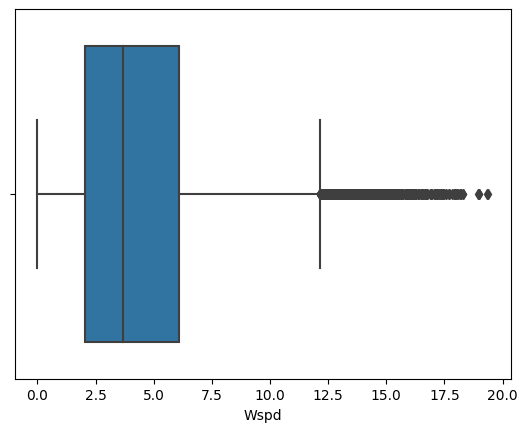

In [ ]:
sns.boxplot(data=wtb_df.query('TurbID == 133'), x="Wspd")

<Axes: xlabel='Wspd'>

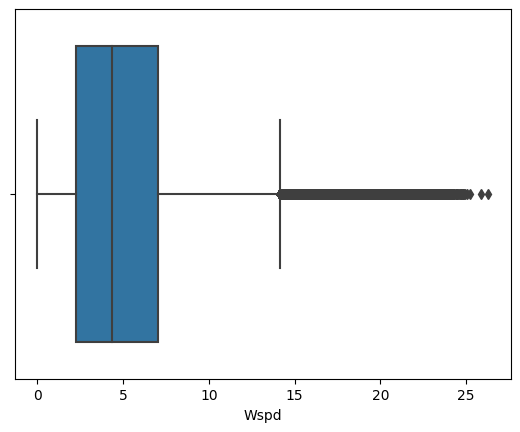

In [10]:
sns.boxplot(data=wtb_df, x="Wspd")

<Axes: xlabel='TurbID', ylabel='Patv'>

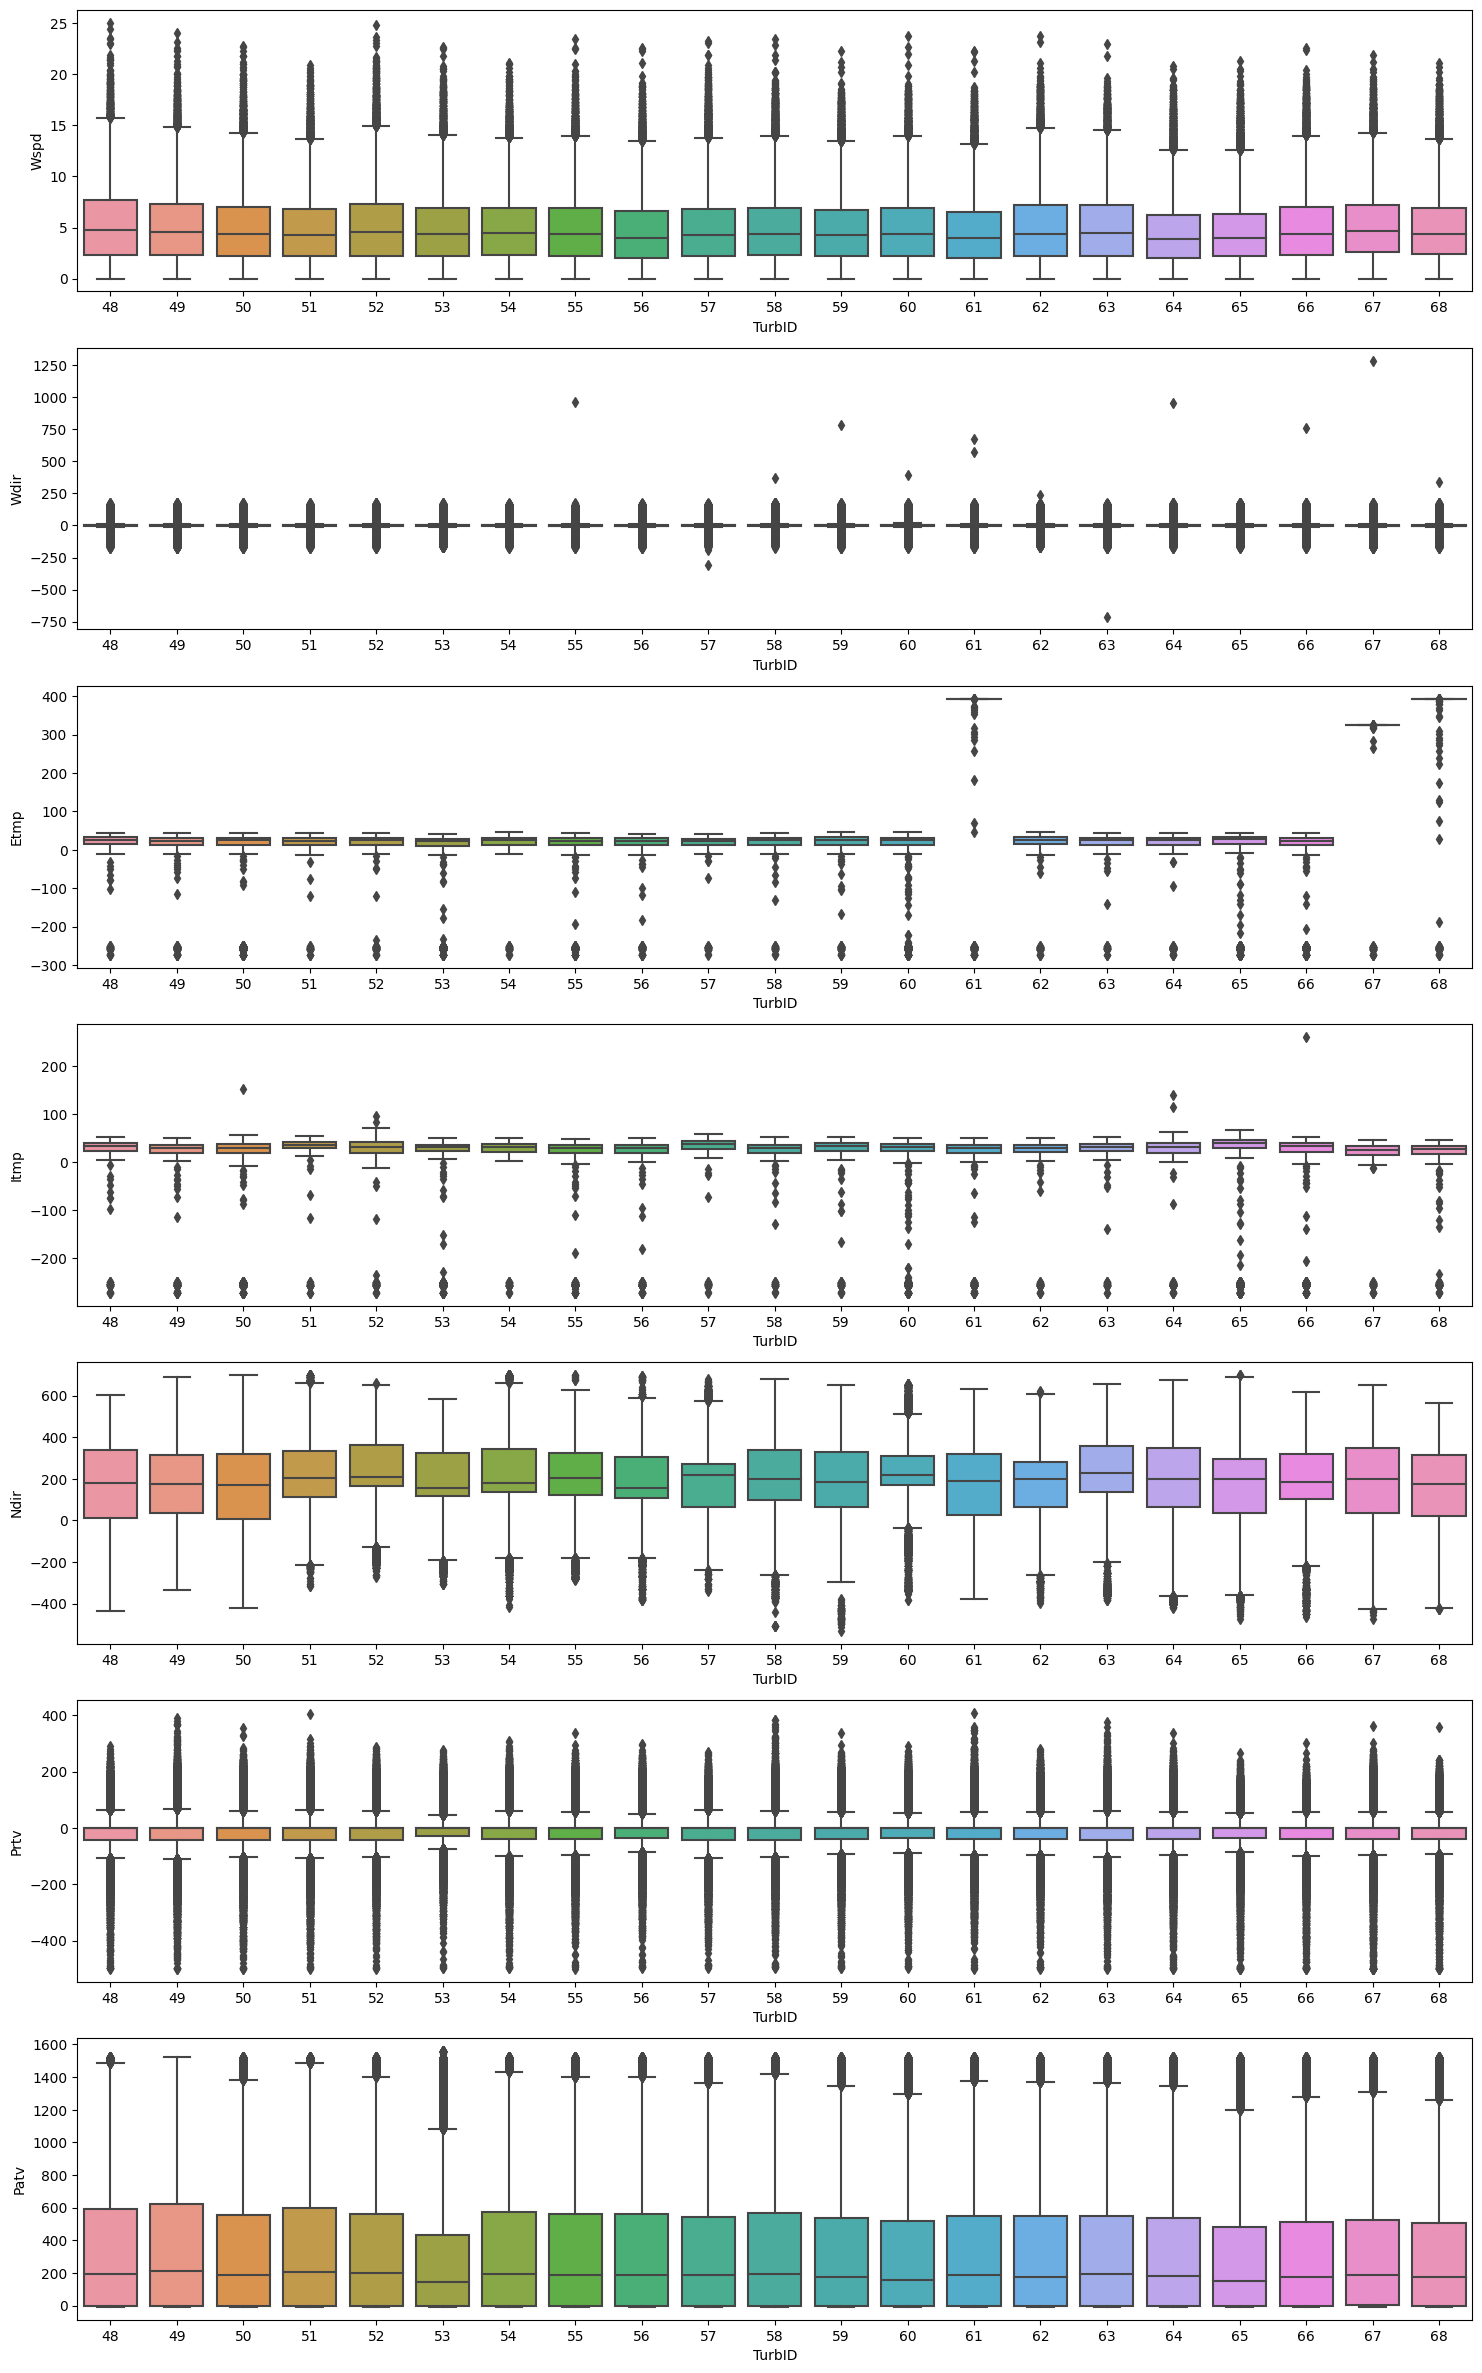

In [ ]:
fig, axes = plt.subplots(7, 1, figsize=(18, 30))

df = wtb_df.query('TurbID >= 48 and TurbID <= 68')

sns.boxplot(ax=axes[0], data=df, x='TurbID', y='Wspd')
sns.boxplot(ax=axes[1], data=df, x='TurbID', y='Wdir')
sns.boxplot(ax=axes[2], data=df, x='TurbID', y='Etmp')
sns.boxplot(ax=axes[3], data=df, x='TurbID', y='Itmp')
sns.boxplot(ax=axes[4], data=df, x='TurbID', y='Ndir')
sns.boxplot(ax=axes[5], data=df, x='TurbID', y='Prtv')
sns.boxplot(ax=axes[6], data=df, x='TurbID', y='Patv')

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


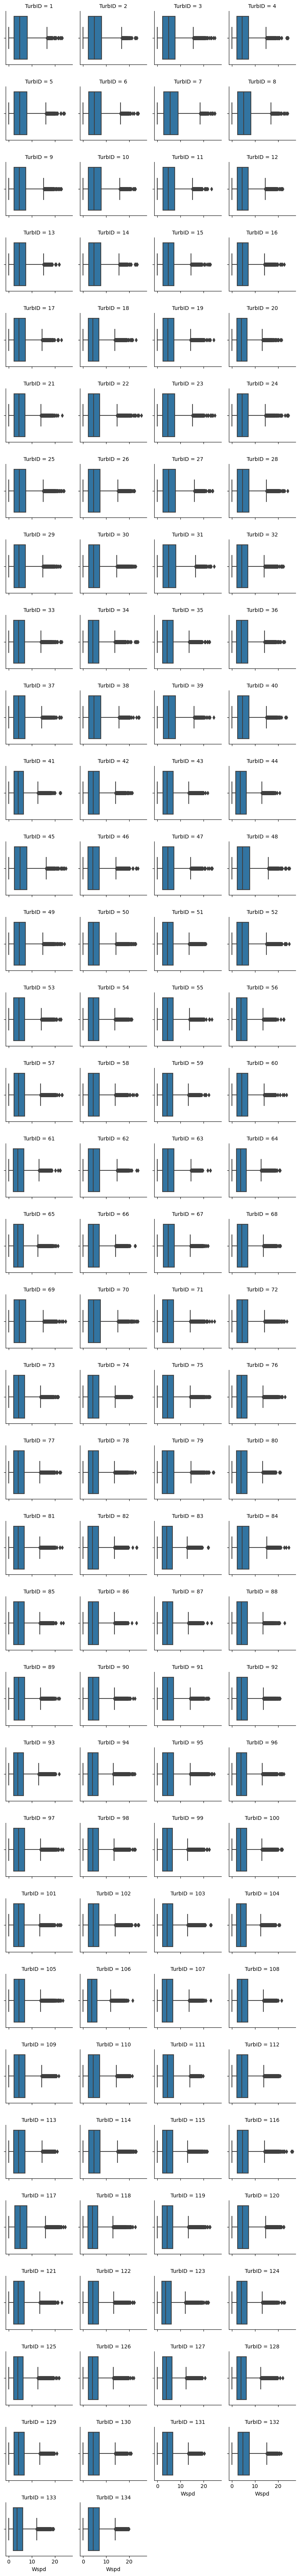

In [ ]:
g = sns.FacetGrid(wtb_df, col="TurbID", col_wrap=4, height=2)
g.map(sns.boxplot, "Wspd")

## Histogram

<Axes: xlabel='Wspd', ylabel='Count'>

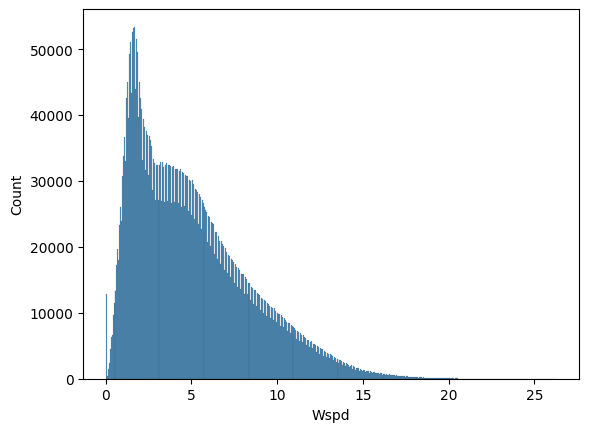

In [4]:
sns.histplot(data=wtb_df, x="Wspd")

In [ ]:
sns.histplot(data=wtb_df, x="Wspd", hue="TurbID")

<Axes: xlabel='Wdir', ylabel='Count'>

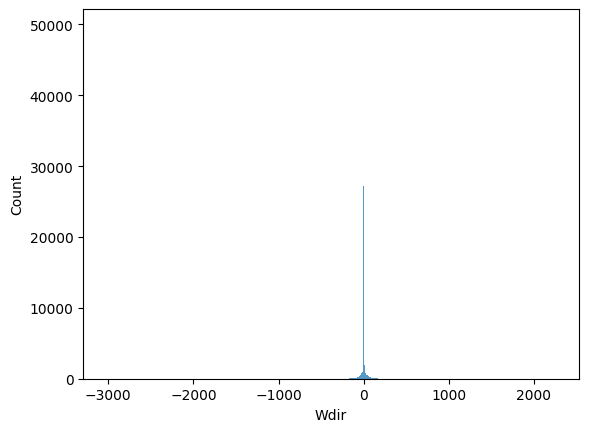

In [5]:
sns.histplot(data=wtb_df, x="Wdir")

<Axes: ylabel='Count'>

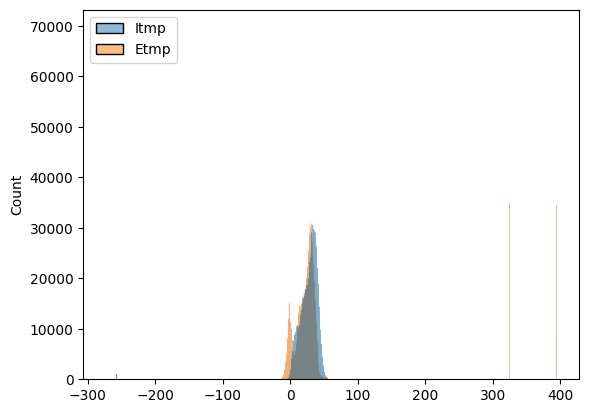

In [8]:
sns.histplot(data=wtb_df[["Itmp","Etmp"]])

<Axes: xlabel='Prtv', ylabel='Count'>

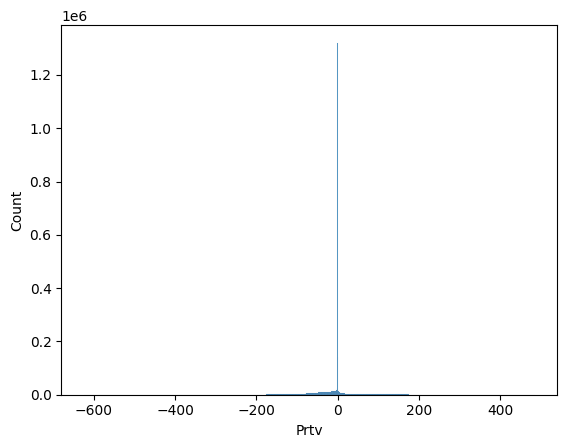

In [9]:
sns.histplot(data=wtb_df, x="Prtv")

<Axes: xlabel='Ndir', ylabel='Count'>

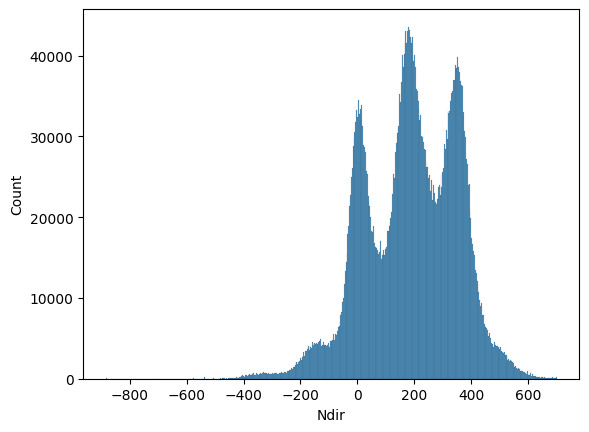

In [11]:
sns.histplot(data=wtb_df, x="Ndir")

## correlations

### heat map

In [13]:
corr_df = wtb_df.drop(columns=['TurbID','Day'])

corr_mat = corr_df.corr()
corr_mat

Wspd      Wdir      Etmp      Itmp      Ndir      Pab1      Pab2  \
Wspd  1.000000 -0.026125  0.038582  0.160863 -0.053345 -0.414822 -0.415002   
Wdir -0.026125  1.000000 -0.004779 -0.012818  0.007149  0.037967  0.038329   
Etmp  0.038582 -0.004779  1.000000  0.170520 -0.026387 -0.004533 -0.004741   
Itmp  0.160863 -0.012818  0.170520  1.000000 -0.026286 -0.030568 -0.030692   
Ndir -0.053345  0.007149 -0.026387 -0.026286  1.000000  0.001935  0.002299   
Pab1 -0.414822  0.037967 -0.004533 -0.030568  0.001935  1.000000  0.998896   
Pab2 -0.415002  0.038329 -0.004741 -0.030692  0.002299  0.998896  1.000000   
Pab3 -0.414829  0.038065 -0.004416 -0.030616  0.001644  0.998527  0.998516   
Prtv  0.194885  0.004154  0.004303  0.023704 -0.033534  0.141629  0.141577   
Patv  0.812945 -0.026436  0.017973  0.106521 -0.035592 -0.507240 -0.507012   

          Pab3      Prtv      Patv  
Wspd -0.414829  0.194885  0.812945  
Wdir  0.038065  0.004154 -0.026436  
Etmp -0.004416  0.004303  0.017973  
Itmp -0.030616  0.023704  0.106521  
Ndir  0.001644 -0.033534 -0.035592  
Pab1  0.998527  0.141629 -0.507240  
Pab2  0.998516  0.141577 -0.507012  
Pab3  1.000000  0.141547 -0.506833  
Prtv  0.141547  1.000000  0.233711  
Patv -0.506833  0.233711  1.000000

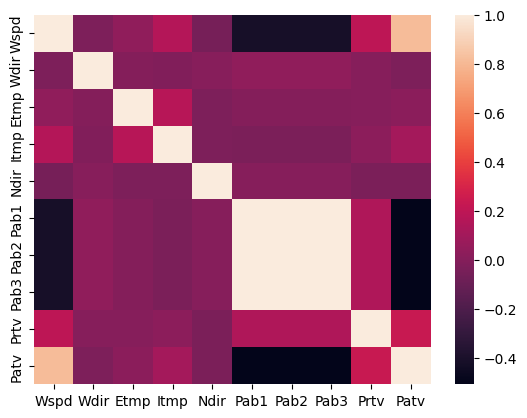

In [14]:
sns.heatmap(corr_mat);

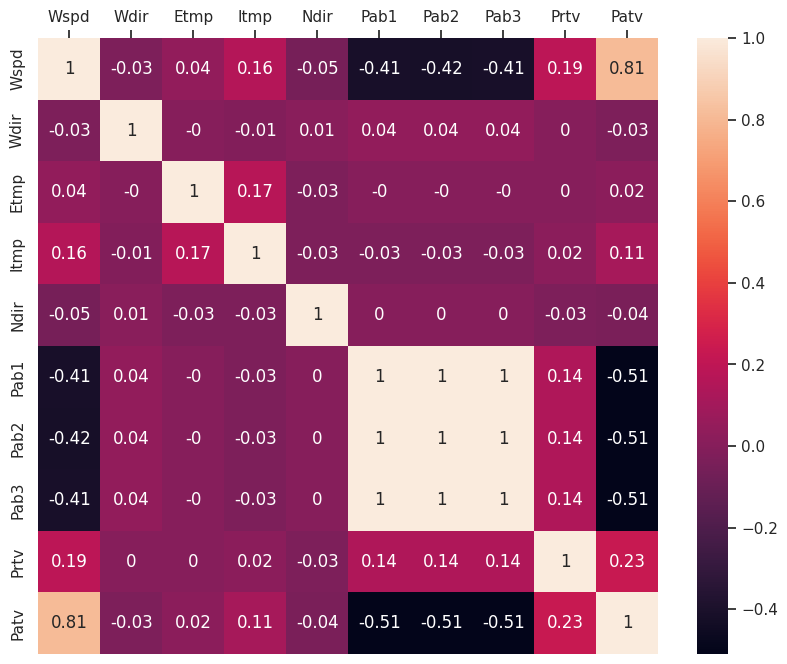

In [18]:
sns.set(rc={'figure.figsize':(10,8)})

ax = sns.heatmap(corr_mat.round(2), annot=True)
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()

### linear subplots

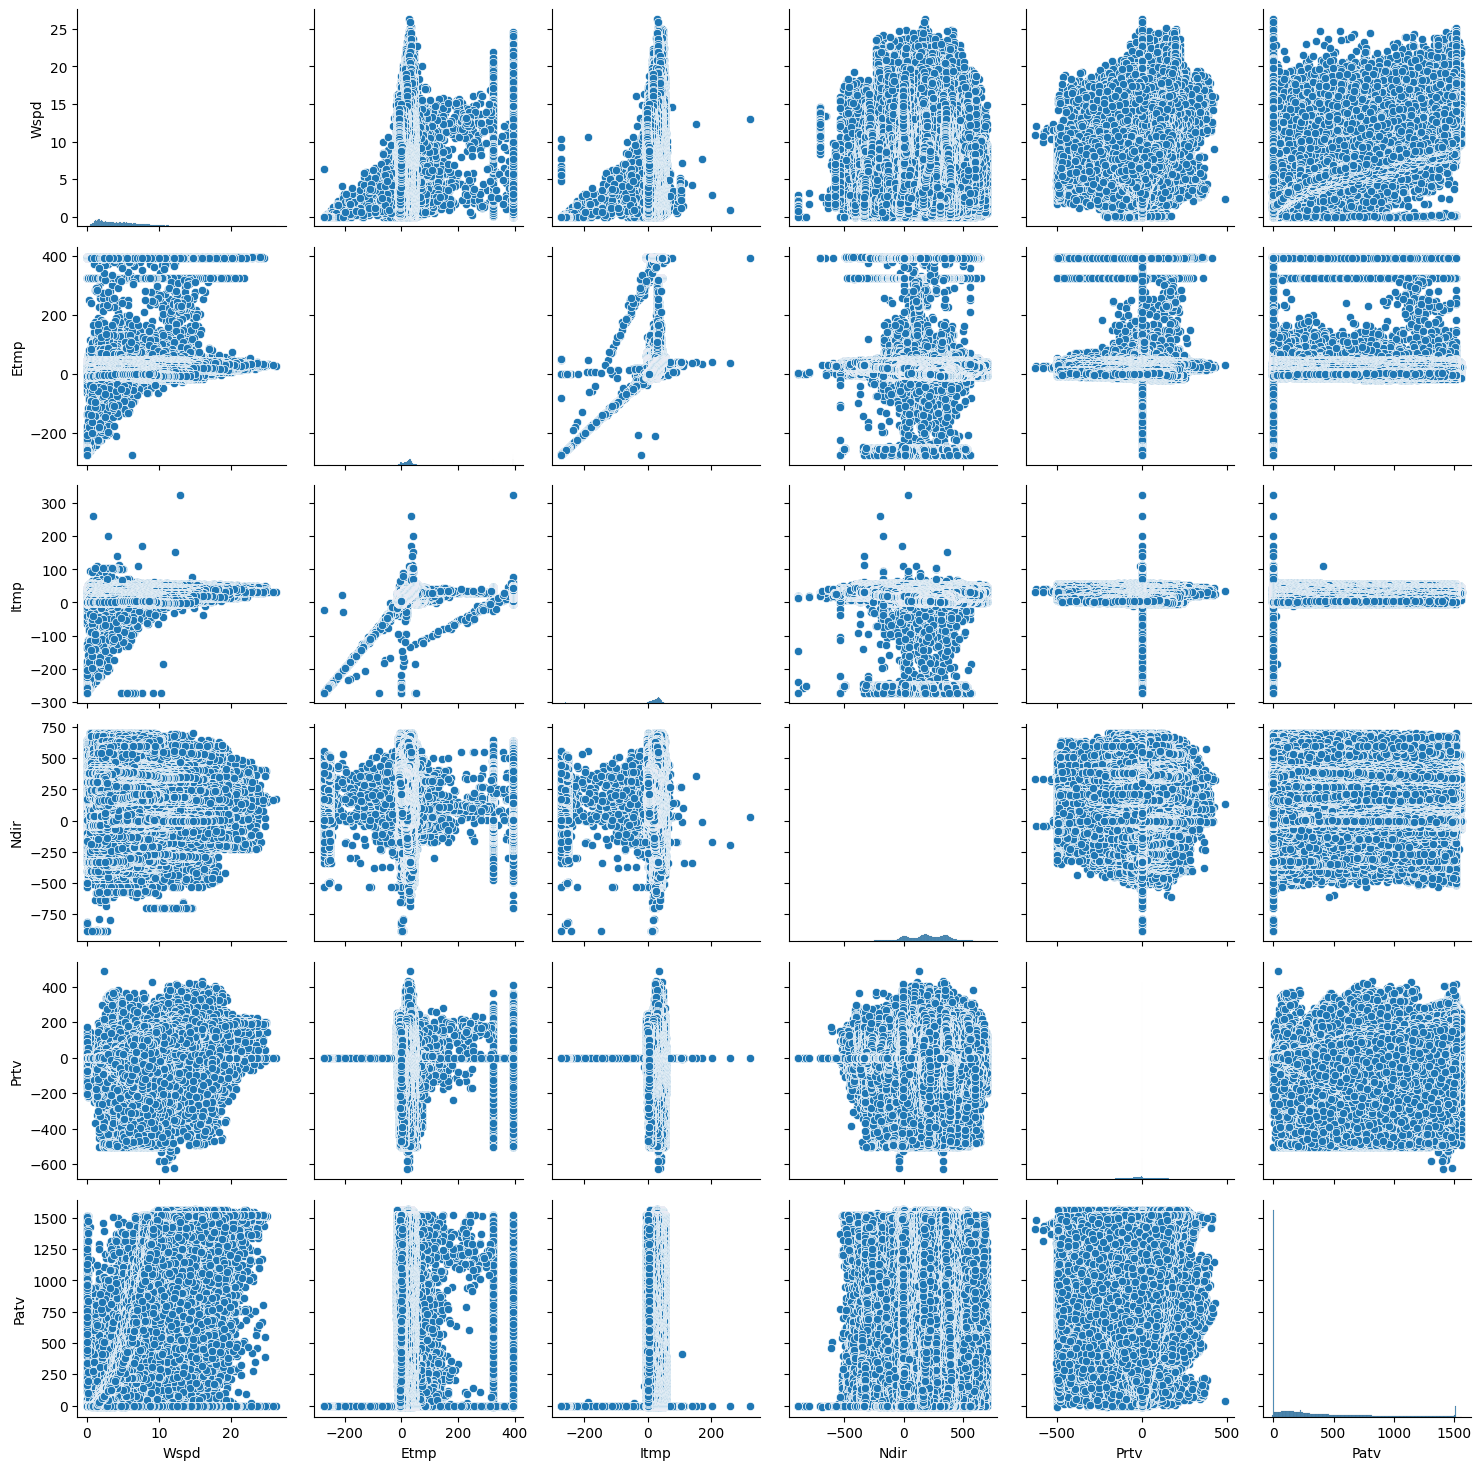

In [ ]:
g = sns.PairGrid(wtb_df[['Wspd','Etmp','Itmp','Ndir','Prtv','Patv']])
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

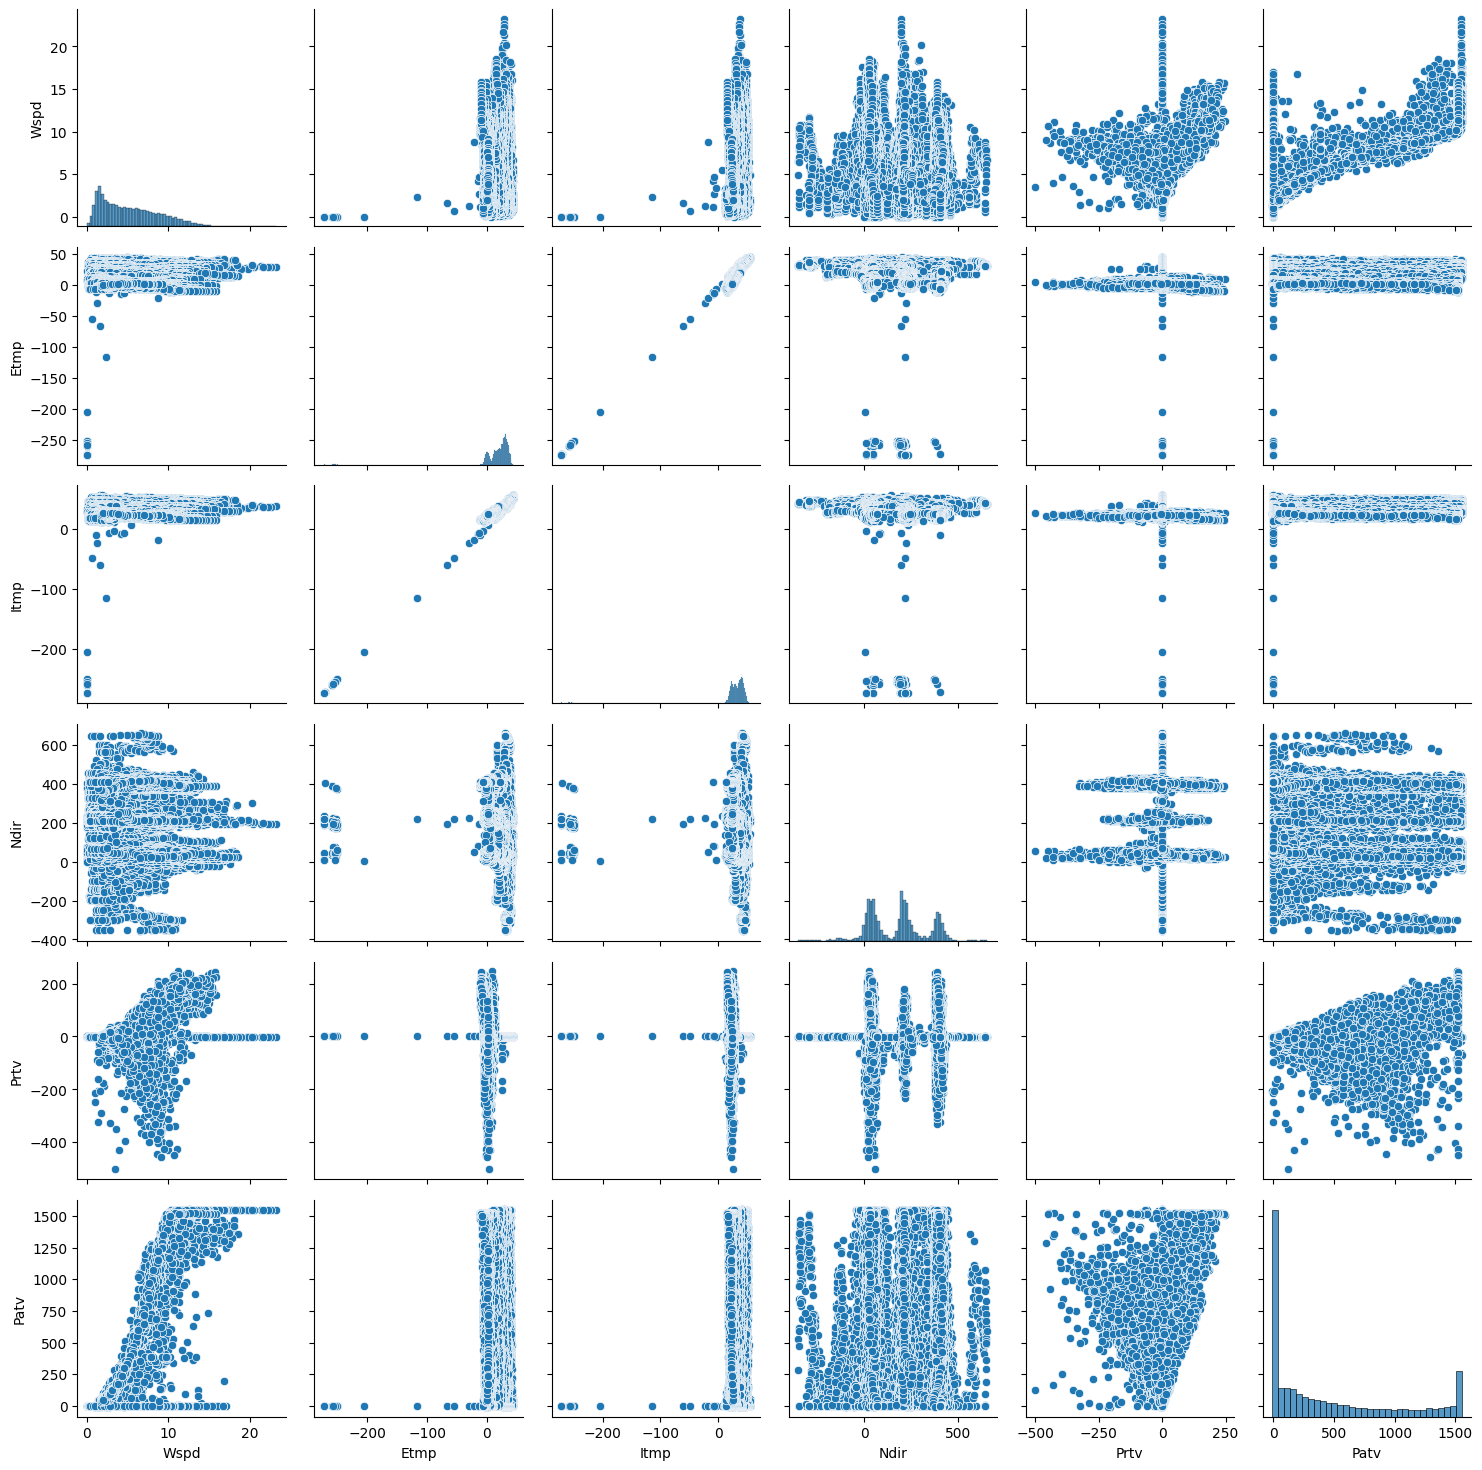

In [ ]:
g = sns.PairGrid(wtb_df.query('TurbID == 1')[['Wspd','Etmp','Itmp','Ndir','Prtv','Patv']])
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

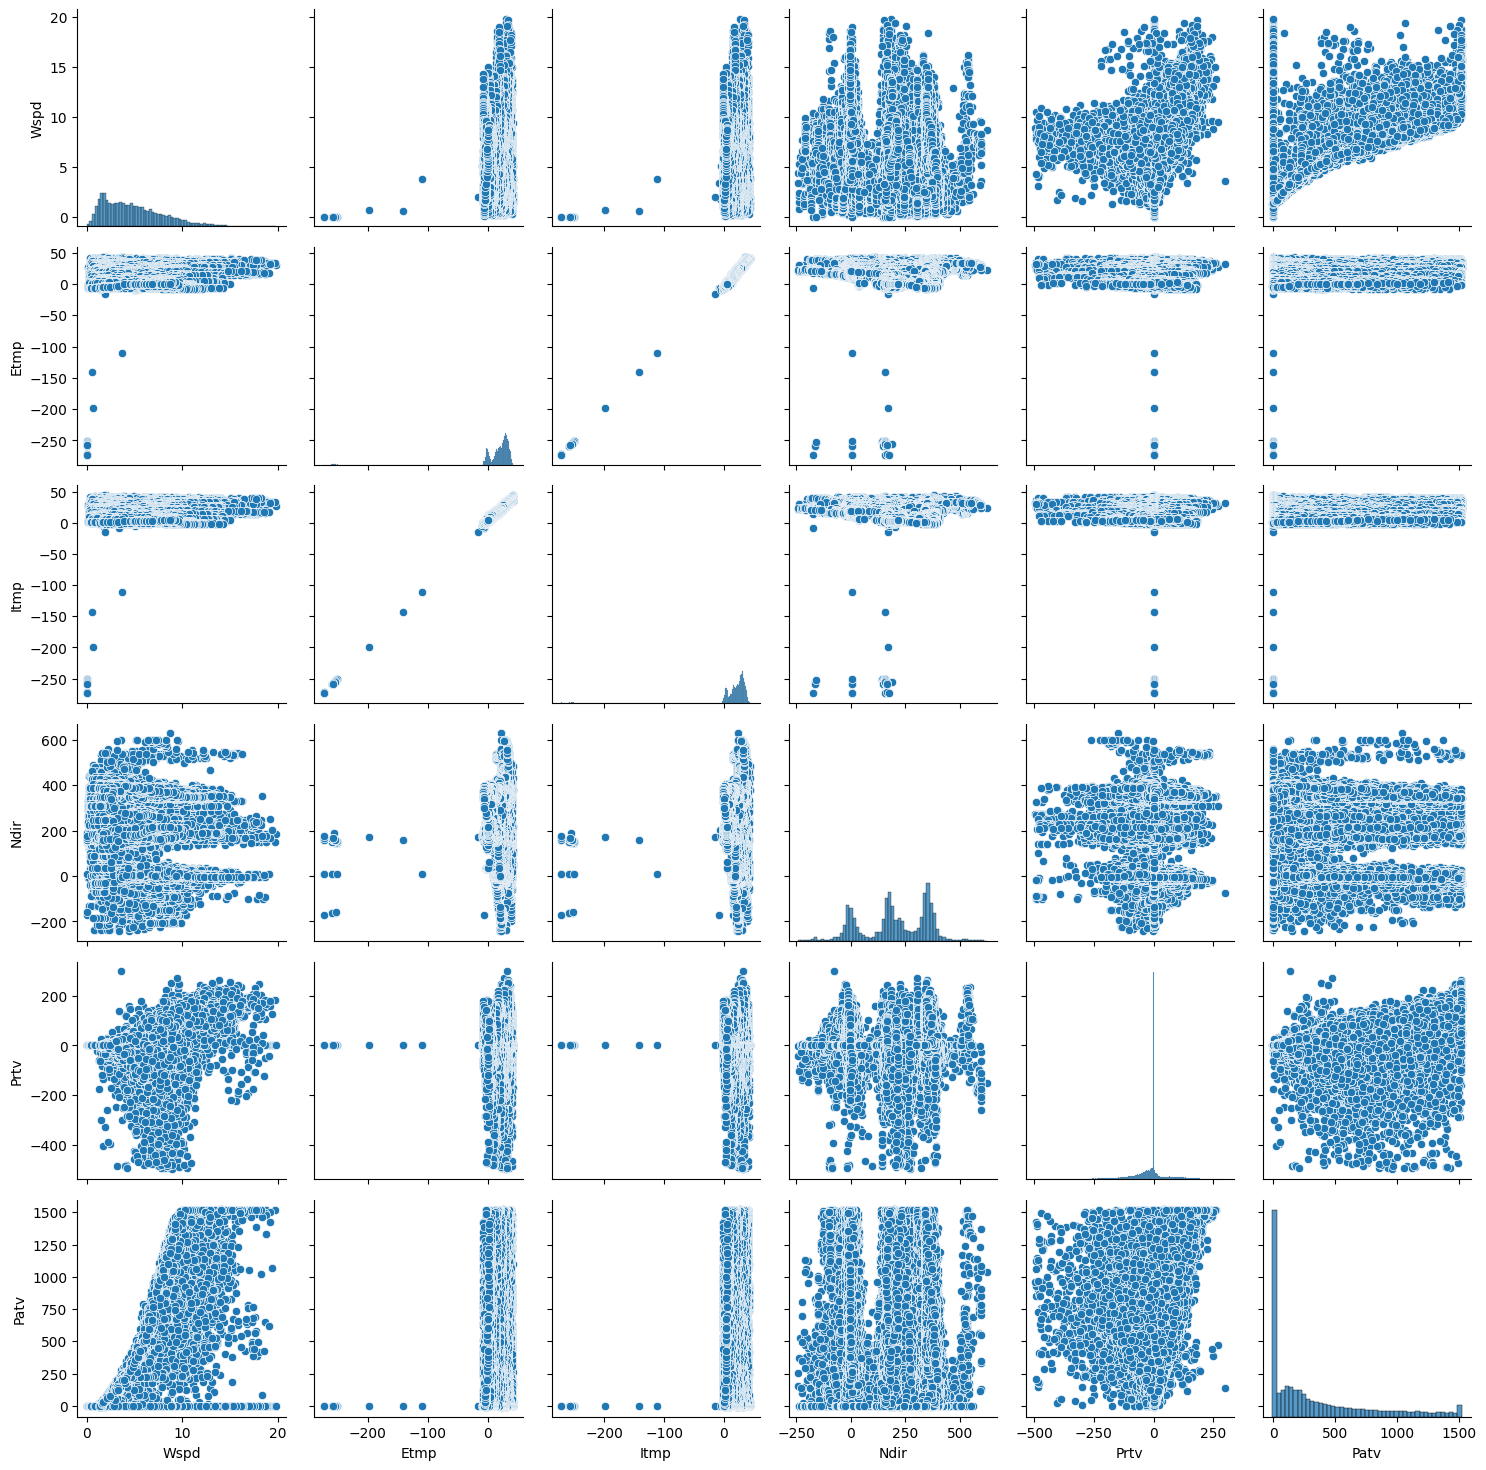

In [ ]:
g = sns.PairGrid(wtb_df.query('TurbID == 134')[['Wspd','Etmp','Itmp','Ndir','Prtv','Patv']])
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

# Time serial sequence visualization

## preprocessing

In [ ]:
wtb_df['Date'] = pd.to_datetime(wtb_df['Tmstamp'])
wtb_df['offsetDate'] = wtb_df.apply(lambda r: r['Date'] + pd.DateOffset(days=r['Day']), axis=1)

In [ ]:
# save -- optional
wtb_df.to_csv(root+'wtbdata_offset_for_vis.csv')

## Turbines distribution

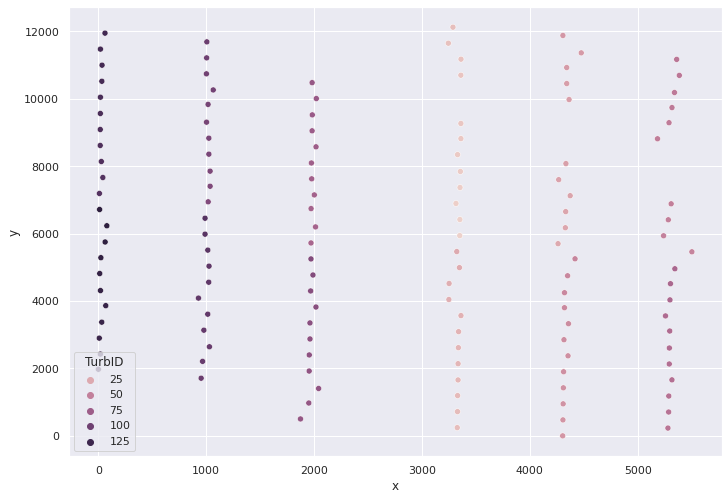

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=location_df, x="x", y="y", hue="TurbID")
#place legend in center right of plot
plt.legend(loc='lower left', title='TurbID')

Turbine Distribution with IDLabels

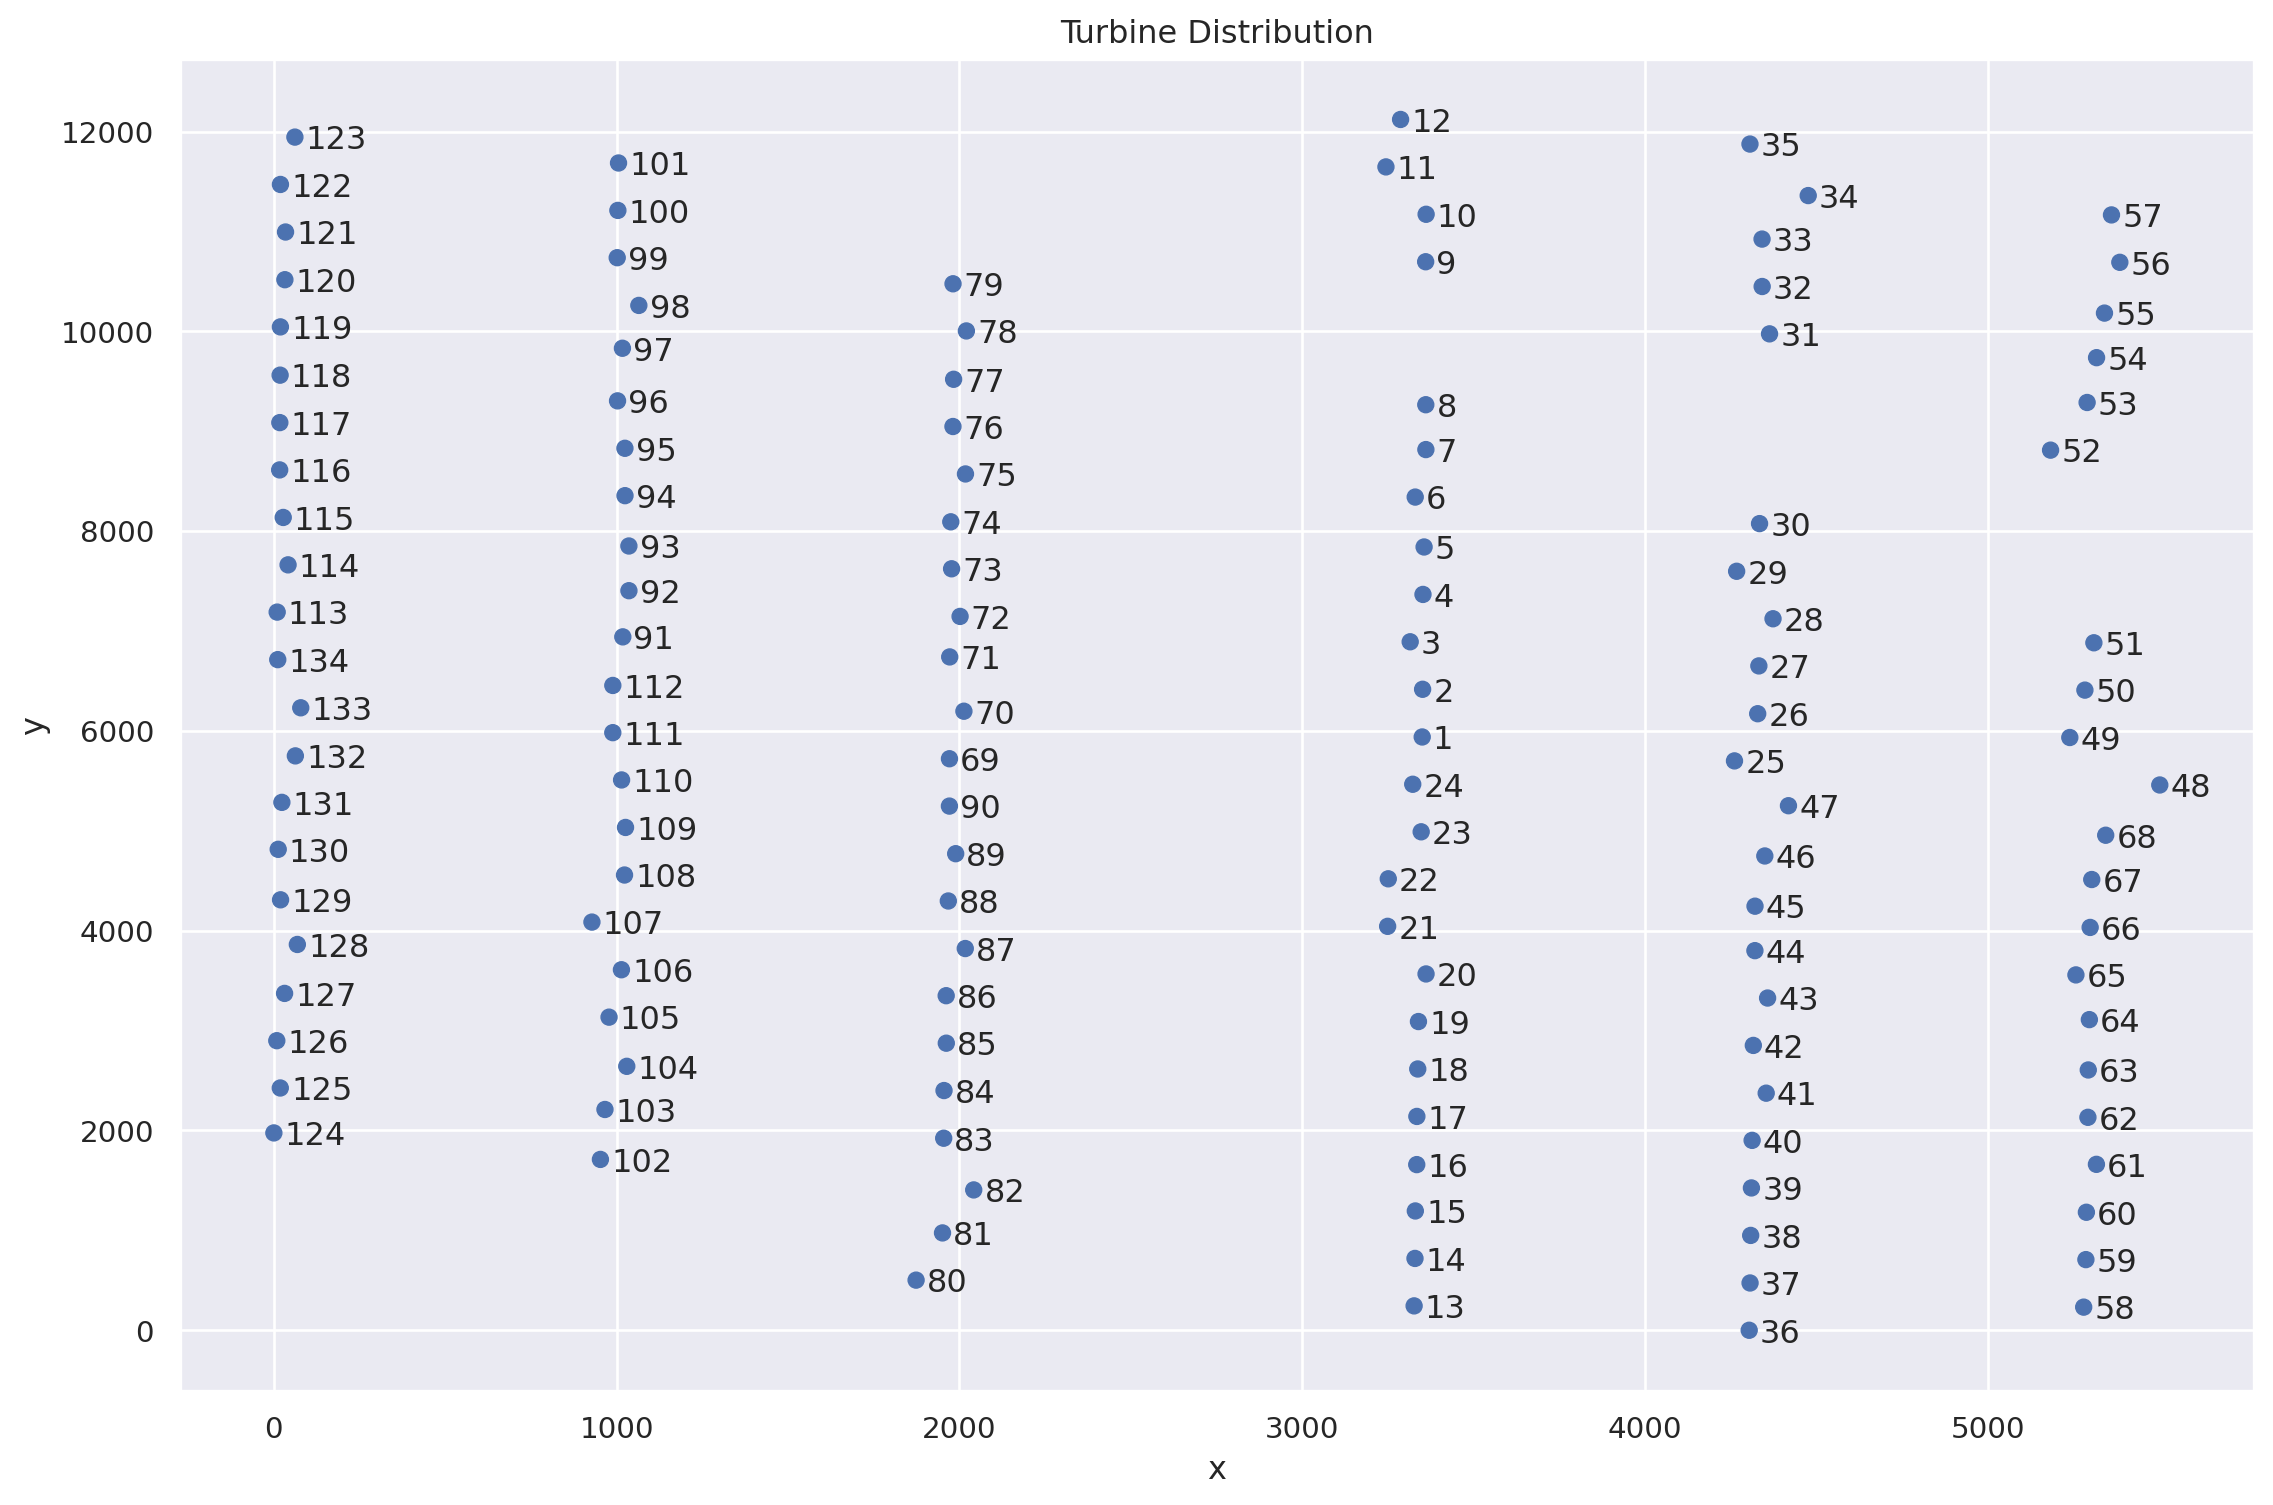

In [ ]:
so.Plot(location_df, x="x", y="y", text="TurbID")\
.add(so.Dot())\
.add(so.Text(halign="left"))\
.label(title="Turbine Distribution", x="x", y="y")\
.layout(size=(12, 8))

## Initial groups -- by col

Group by cols

In [ ]:
groups_bycol = [(113, 134), (91, 112), (69, 90), (1, 24), (25, 47), (48, 68)]

## Viz

Plot the Patv Trend of TurbID=1

<Axes: xlabel='offsetDate', ylabel='Patv'>

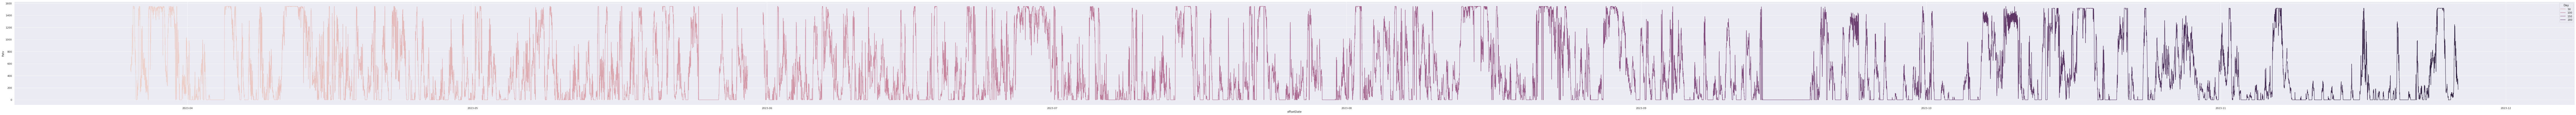

In [ ]:
sns.set(rc={'figure.figsize':(200,8.27)})
Turb_1_all = wtb_df[wtb_df['TurbID']==1]
sns.lineplot(data = Turb_1_all, x="offsetDate", y="Patv", hue="Day")

Plot the Patv Trend by Time of a Single Day (Day=1)



<Axes: xlabel='offsetDate', ylabel='Patv'>

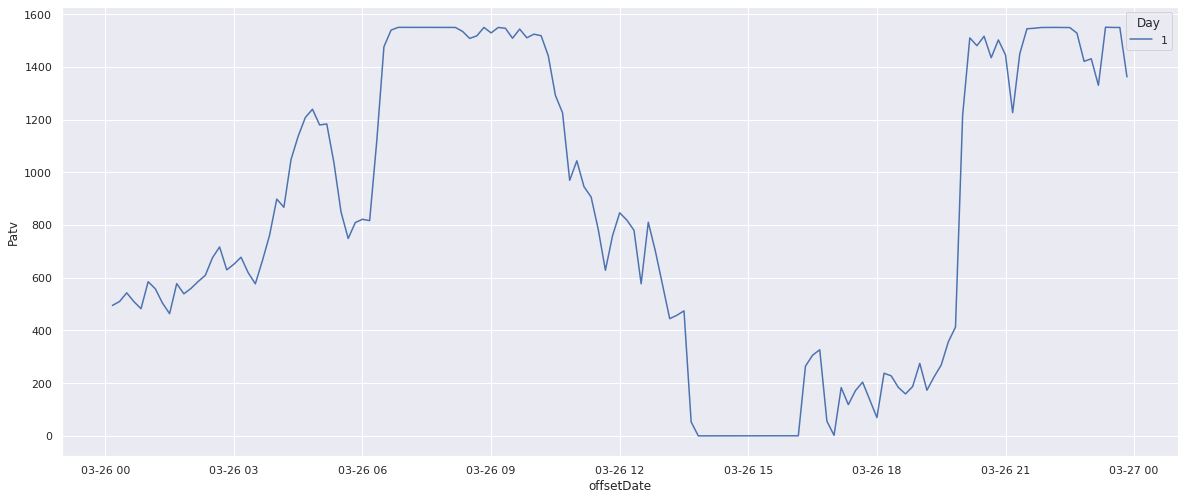

In [ ]:
sns.set(rc={'figure.figsize':(20,8.27)})
Turb_1_Day1 = wtb_df[wtb_df['TurbID']==1]
Turb_1_Day1 = Turb_1_Day1[Turb_1_Day1['Day']==1]
sns.lineplot(data = Turb_1_Day1, x="offsetDate", y="Patv", hue="Day")

Plot the Patv Trend Within a Group (ie. Group(by col)=0)

<Axes: xlabel='offsetDate', ylabel='Patv'>

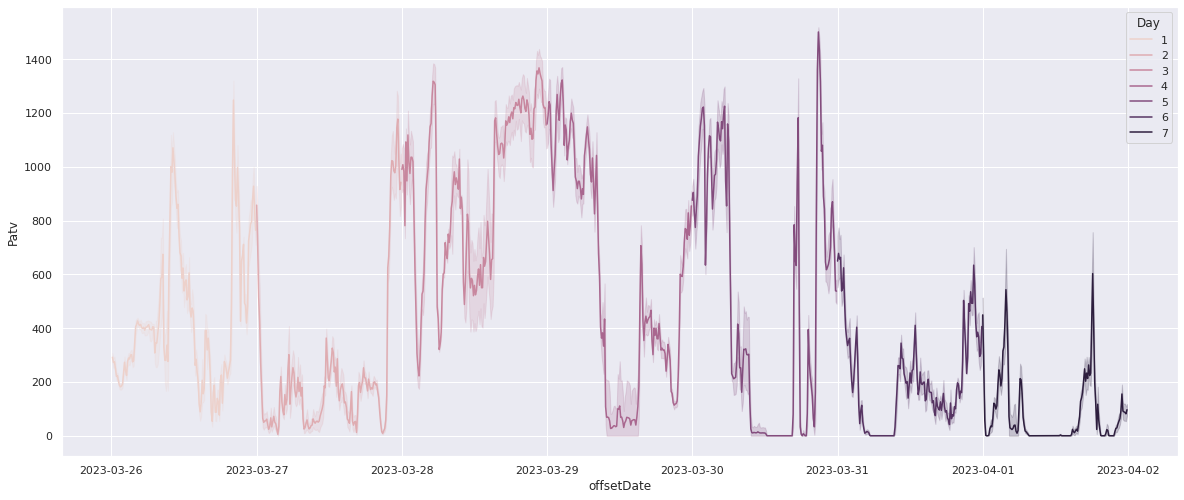

In [ ]:
sns.set(rc={'figure.figsize':(20,8.27)})
Turb_group1_7Days = wtb_df[(wtb_df['TurbID']>=groups_bycol[0][0])&(wtb_df['TurbID']<=groups_bycol[0][1])]
Turb_group1_7Days = Turb_group1_7Days[Turb_group1_7Days['Day'] <= 7]
sns.lineplot(data = Turb_group1_7Days, x="offsetDate", y="Patv", hue="Day")

we can see that 113 is slightly different from 134 in the aspect of volume

but their trend are similar.(i.e. there is no obvious outliers in this group)

<Axes: xlabel='offsetDate', ylabel='Patv'>

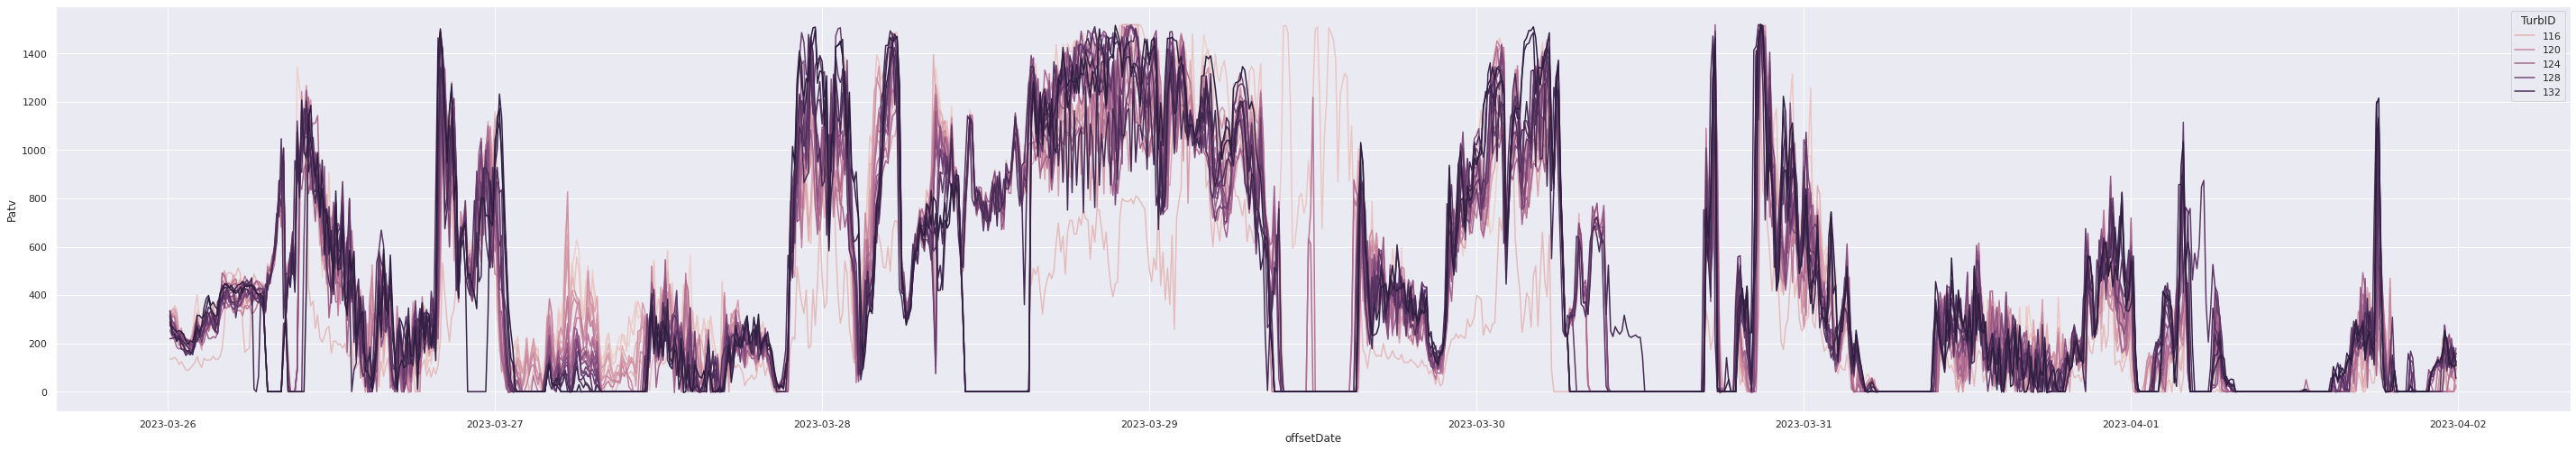

In [ ]:
sns.set(rc={'figure.figsize':(50,8.27)})
sns.lineplot(data = Turb_group1_7Days, x="offsetDate", y="Patv", hue="TurbID")

Plot the Patv Trend Within a Group (ie. Group(by col)=5)

<Axes: xlabel='offsetDate', ylabel='Patv'>

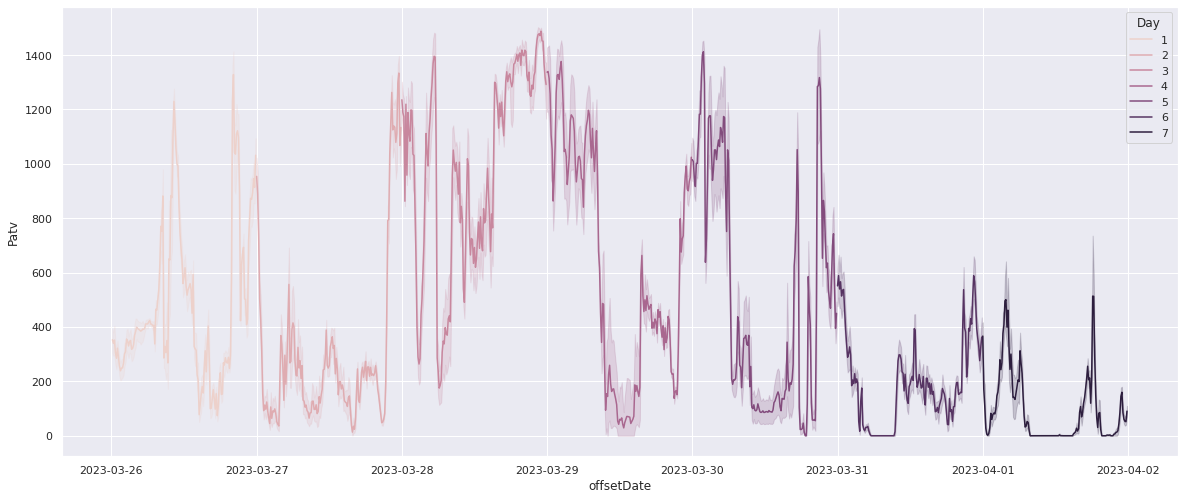

In [ ]:
sns.set(rc={'figure.figsize':(20,8.27)})
Turb_group6_7Days = wtb_df[(wtb_df['TurbID']>=groups_bycol[5][0])&(wtb_df['TurbID']<=groups_bycol[5][1])]
Turb_group6_7Days = Turb_group6_7Days[Turb_group6_7Days['Day'] <= 7]
sns.lineplot(data = Turb_group6_7Days, x="offsetDate", y="Patv", hue="Day")

<Axes: xlabel='offsetDate', ylabel='Patv'>

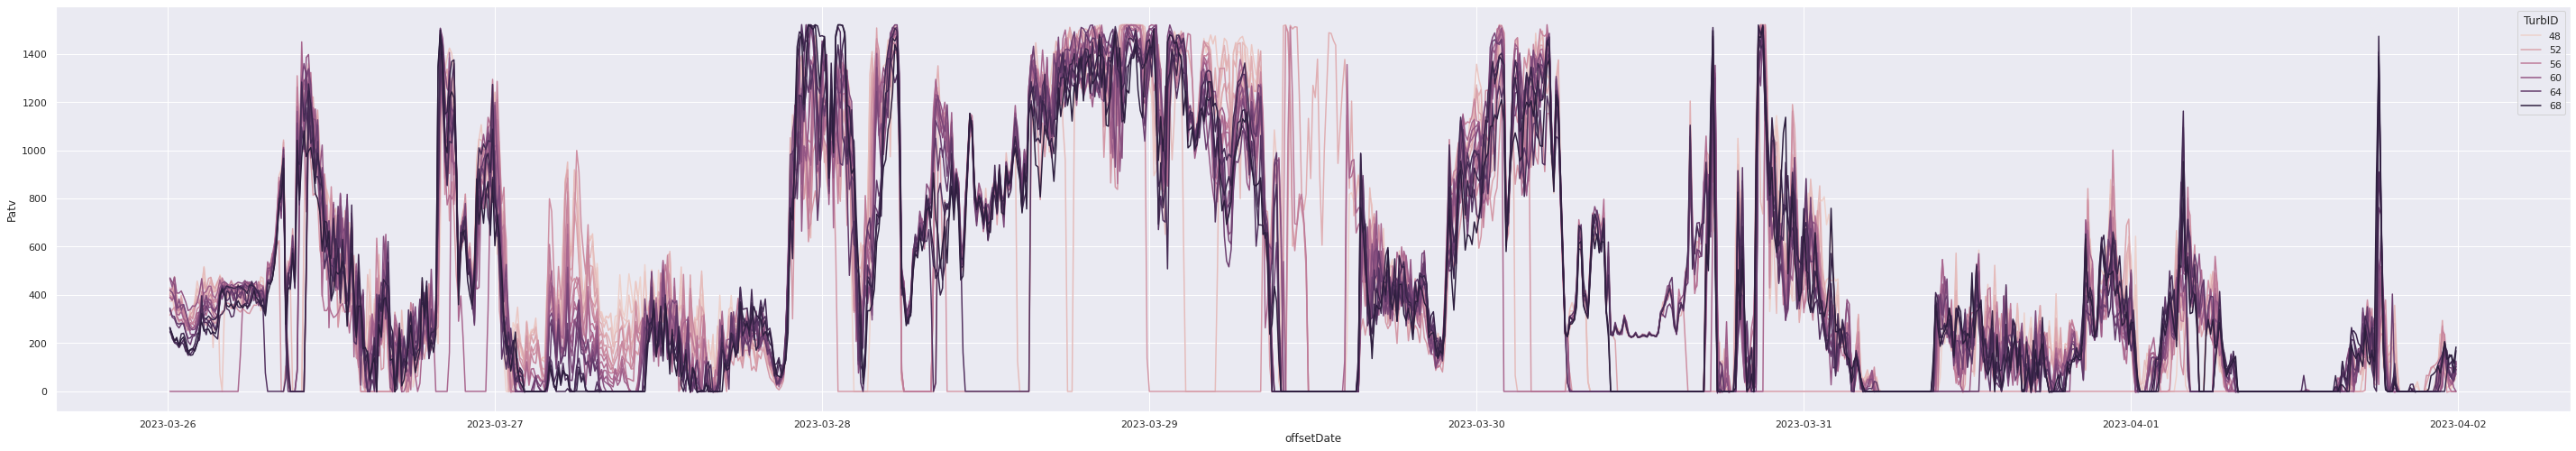

In [ ]:
sns.set(rc={'figure.figsize':(50,8.27)})
sns.lineplot(data = Turb_group6_7Days, x="offsetDate", y="Patv", hue="TurbID")# , palette='Set2'